<a href="https://colab.research.google.com/github/yashmith-r/ML-DataAnalysis-Practice/blob/main/RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the required libraries & Loading the dataset

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("Social_Network_Ads.csv")
print(df)

     Age  EstimatedSalary  Purchased
0     19            19000          0
1     35            20000          0
2     26            43000          0
3     27            57000          0
4     19            76000          0
..   ...              ...        ...
395   46            41000          1
396   51            23000          1
397   50            20000          1
398   36            33000          0
399   49            36000          1

[400 rows x 3 columns]


Spliting the dataset int x and y based on independent var and dependant var

X -> Independant Variable ( Features Used for predictions ), y-> Dependant/target Var ( prediction outcomes )

In [69]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]
print(x)
print("\n")
print(y)

     Age  EstimatedSalary
0     19            19000
1     35            20000
2     26            43000
3     27            57000
4     19            76000
..   ...              ...
395   46            41000
396   51            23000
397   50            20000
398   36            33000
399   49            36000

[400 rows x 2 columns]


0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64


Feature Scaling ( so that larger numeric range variable doesnt dominate the other )

In [70]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)
# After standard scaling it becomes np array
# print(x.head(10)) --> this statement doesnt wrk because x is a array now
print(x[:10])

[[-1.78179743 -1.49004624]
 [-0.25358736 -1.46068138]
 [-1.11320552 -0.78528968]
 [-1.01769239 -0.37418169]
 [-1.78179743  0.18375059]
 [-1.01769239 -0.34481683]
 [-1.01769239  0.41866944]
 [-0.54012675  2.35674998]
 [-1.20871865 -1.07893824]
 [-0.25358736 -0.13926283]]


Spliting the dataset  for Training & Testing

In [71]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.25,random_state=0)

Importing Random Forest

In [72]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=10, criterion='entropy',random_state=0)
# n_estimators determines number of decision trees

Training the Model

In [73]:
rf.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

Predicting the data

In [74]:
y_pred = rf.predict(x_test)
# y_pred is numpy array
print(y_pred[:10])

[0 0 0 0 0 0 0 1 0 1]


Comparing the predicted and actual data

In [75]:
# Convert y_test to a NumPy array if it's not already one
y_test_array = y_test.values if isinstance(y_test, (pd.DataFrame, pd.Series)) else y_test

# Print predictions and actual values side by side
print("y_pred y_test")
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test_array.reshape(len(y_test_array), 1)), axis=1))

# The above line reshapes y_pred and y_test to column vectors and concatenates them side by side

y_pred y_test
[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]]


Confusion Matrix

In [76]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: ")
print(cm)
print("\nAccuracy : ")
accuracy_score(y_test,y_pred)

Confusion Matrix: 
[[63  5]
 [ 3 29]]

Accuracy : 


0.92

Plotting and Visualising the Test Results

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
<ipython-input-67-1e9248ad9bd9>:25: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


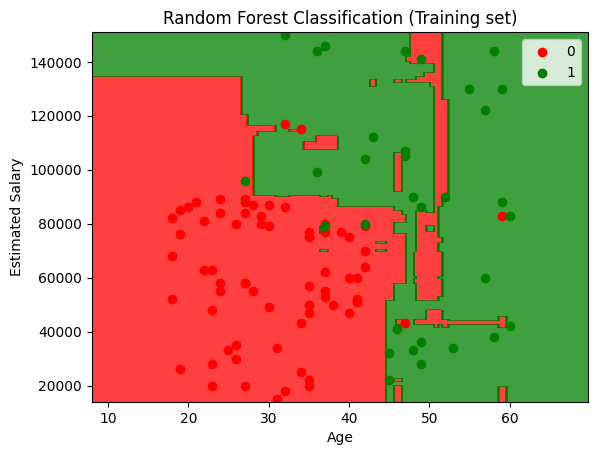

In [67]:
from matplotlib.colors import ListedColormap

# Assuming x_train, y_train, sc, and cf are already defined
# Ensure x_train and y_train are standardized correctly using sc

# Reverting back to original data
X_set, y_set = sc.inverse_transform(x_test), y_test

# Creating the grid
X1, X2 = np.meshgrid(
    np.arange(start=X_set[:, 0].min() - 10, stop=X_set[:, 0].max() + 10, step=0.25),
    np.arange(start=X_set[:, 1].min() - 1000, stop=X_set[:, 1].max() + 1000, step=0.25)
)

# Predicting results and reshaping the results to match the shape of X1
# Plotting the contour
plt.contourf(X1, X2, rf.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape), alpha=0.75, cmap=ListedColormap(('red', 'green')))

# Setting limits for x and y axis
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# Plotting the data points
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c=ListedColormap(('red', 'green'))(i), label=j)

# Adding titles and labels
plt.title('Random Forest Classification (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()
